In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
import pandas as pd
from pathlib import Path

## Plotting source

In [9]:
def plotting_source(spec):
    plt.figure(figsize=[15,7])        
    plt.plot(spec.iloc[:,0], spec.iloc[:,1])
    plt.ylabel('Flux [Jy]')
    plt.xlabel('wavelength [um]')
    plt.show()
    plt.figure(figsize=[15,7])
    plt.errorbar(spec.iloc[:,0], spec.iloc[:,1], spec.iloc[:,2], ecolor= 'red')
    plt.ylabel('Flux [Jy]')
    plt.xlabel('wavelength [um]')
    plt.show()

## Checking for channel overlap

In [10]:
def channel_check_for_overlap(spec):
    a = np.arange(0, len(spec))
    plt.figure(figsize= (15,7))
    for ch in ['1A','1B', '1C', '2A', '2B', '2C','3A', '3B', '3C']:
        ind = a[spec['Band'] == ch]
        plt.scatter(spec.iloc[ind, 0], spec.iloc[ind,1])
    plt.show()

## CODE

In [11]:
def str_to_numpy(lst):
    return [float(i) for i in lst]

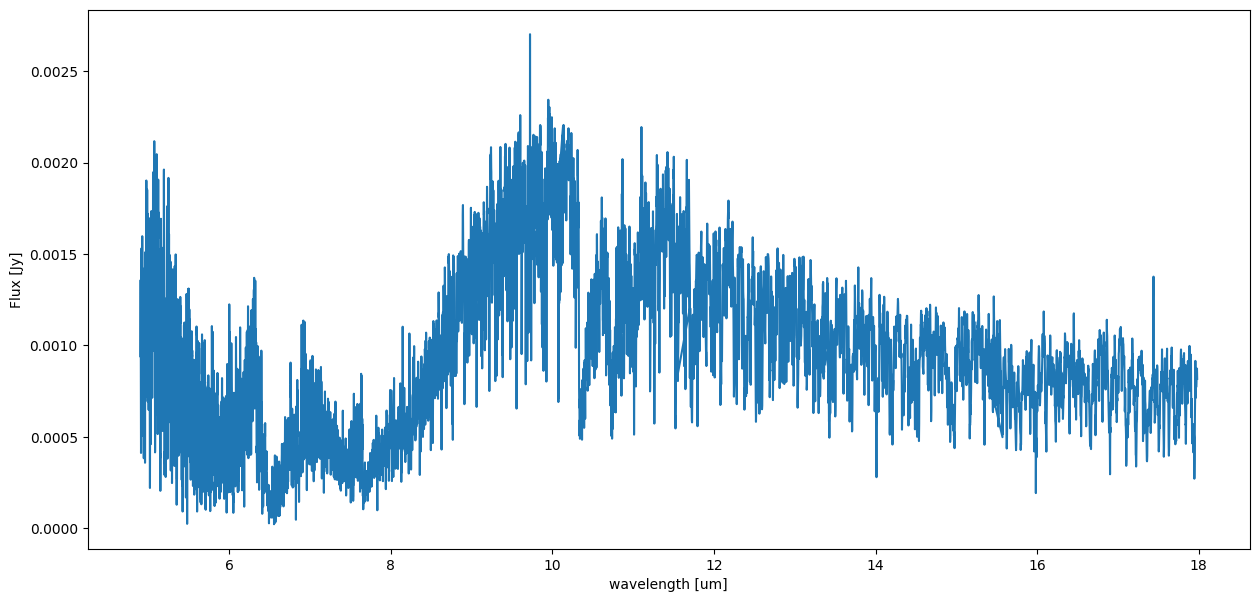

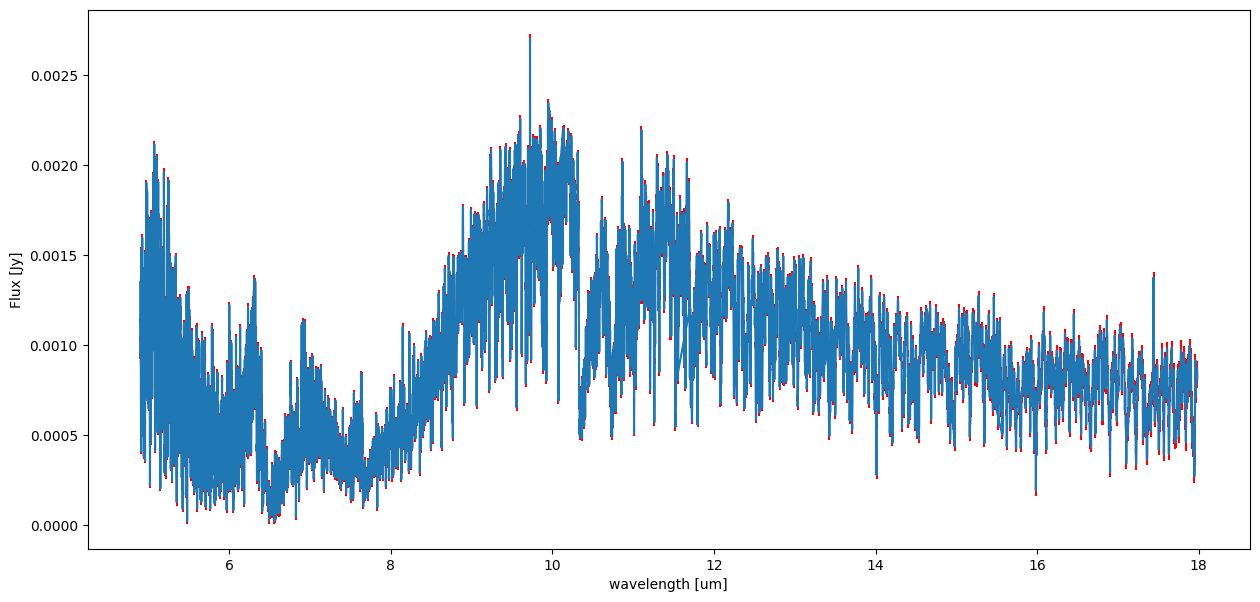

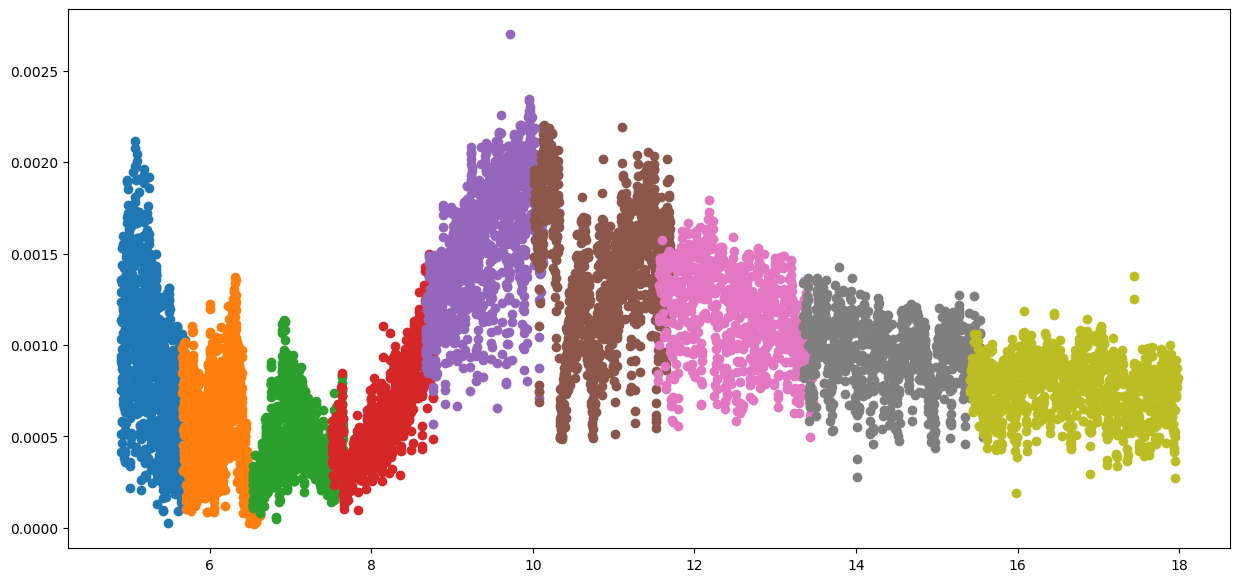

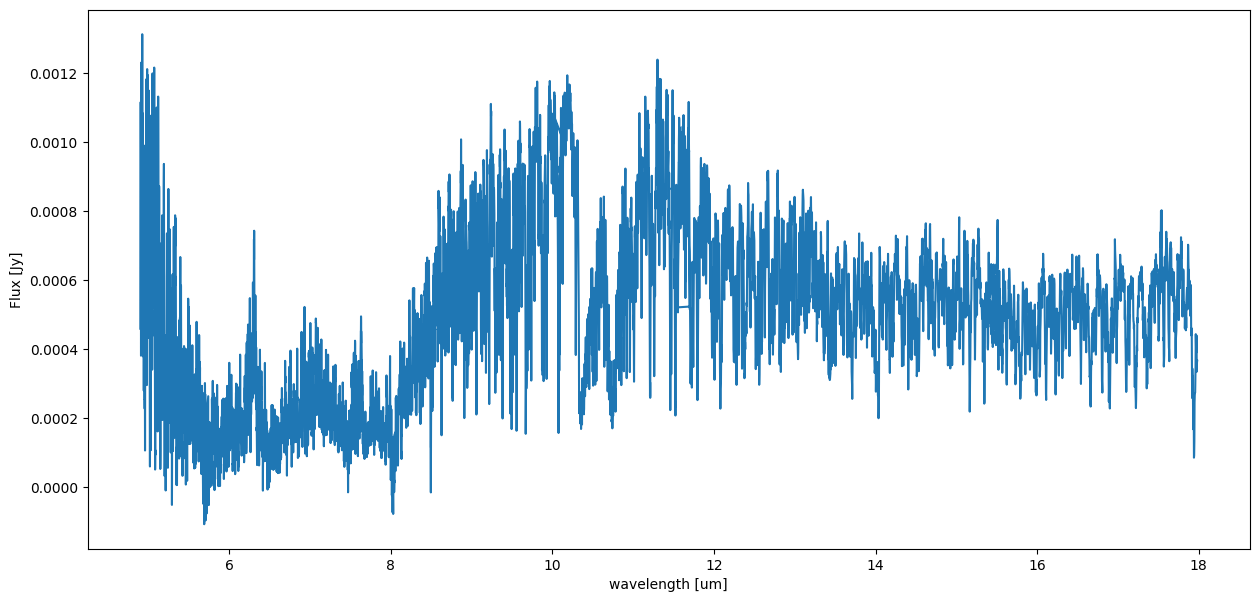

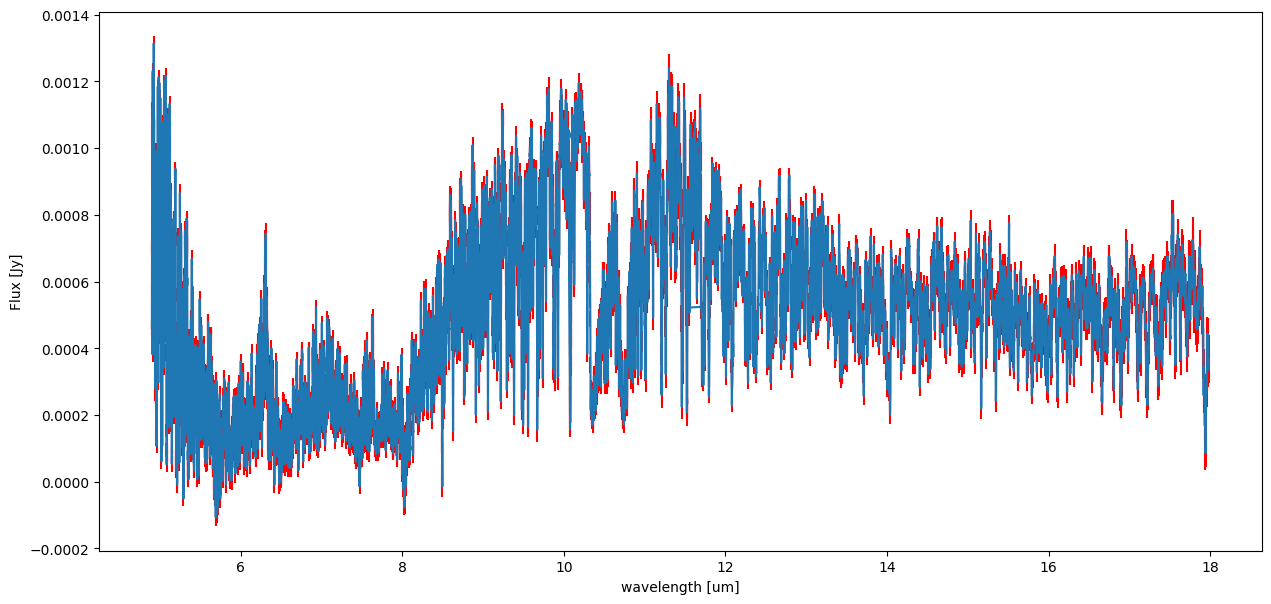

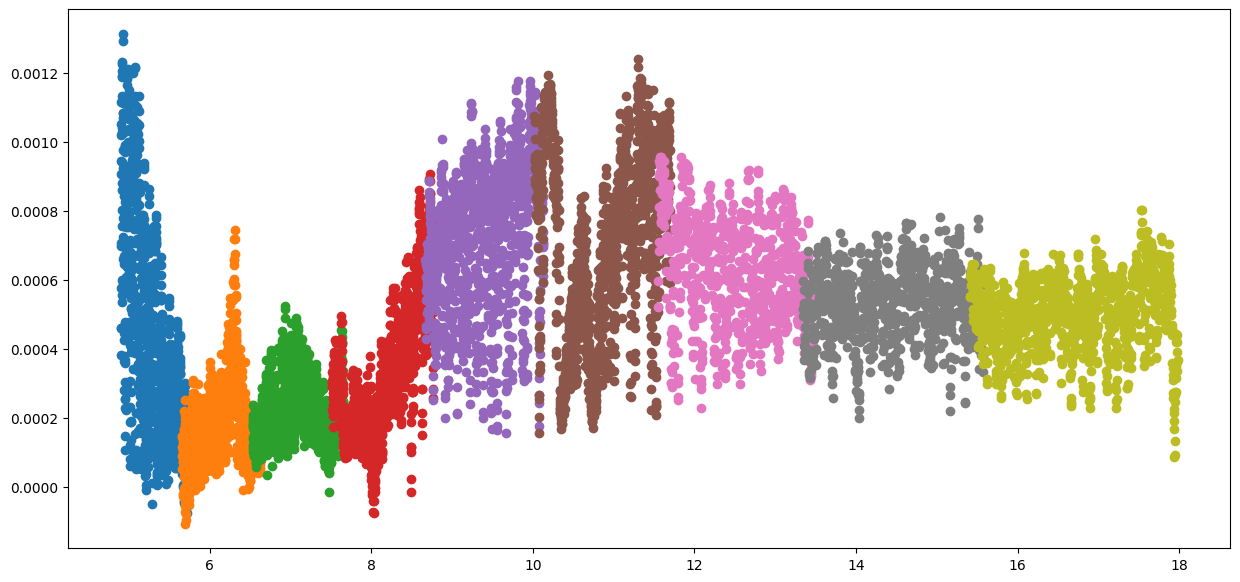

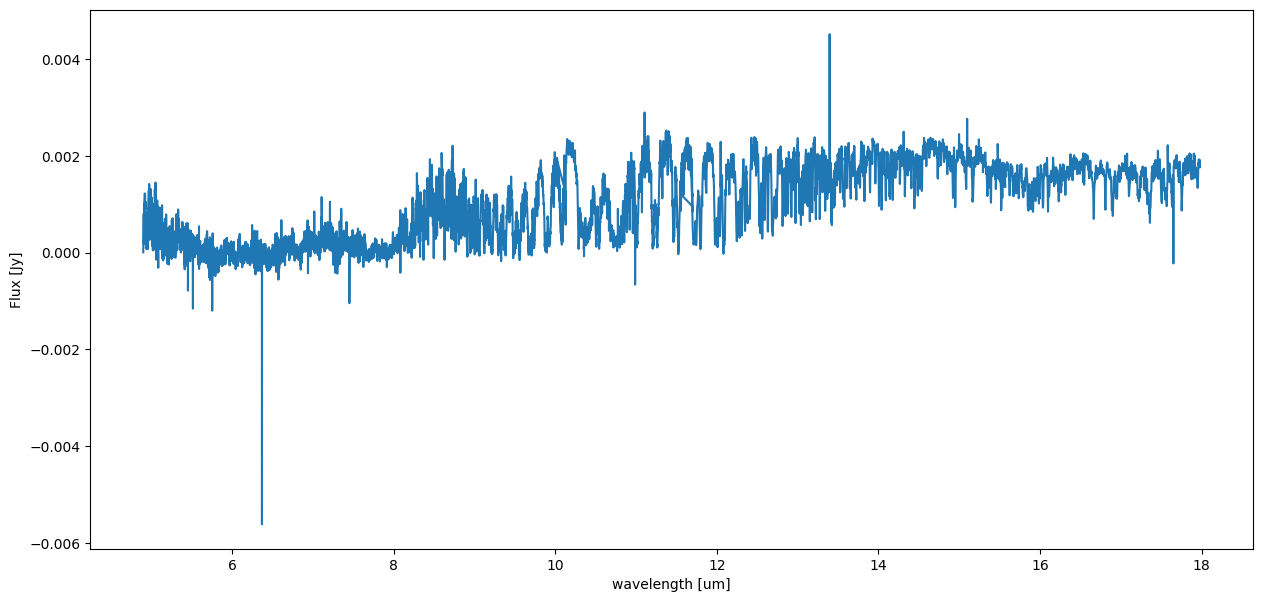

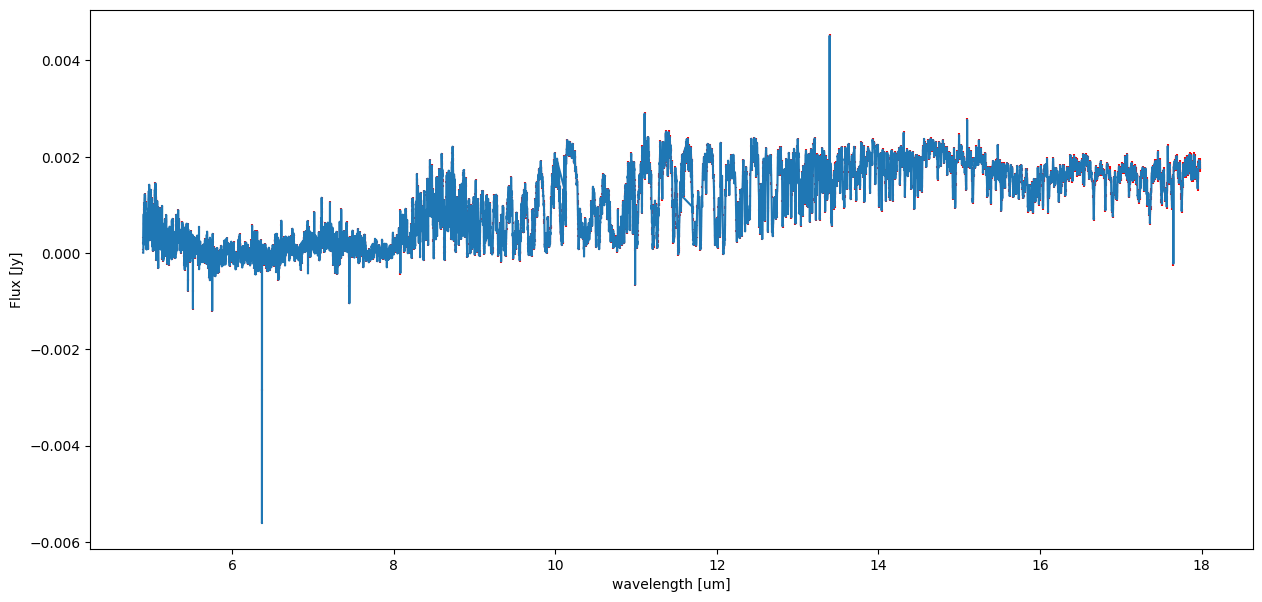

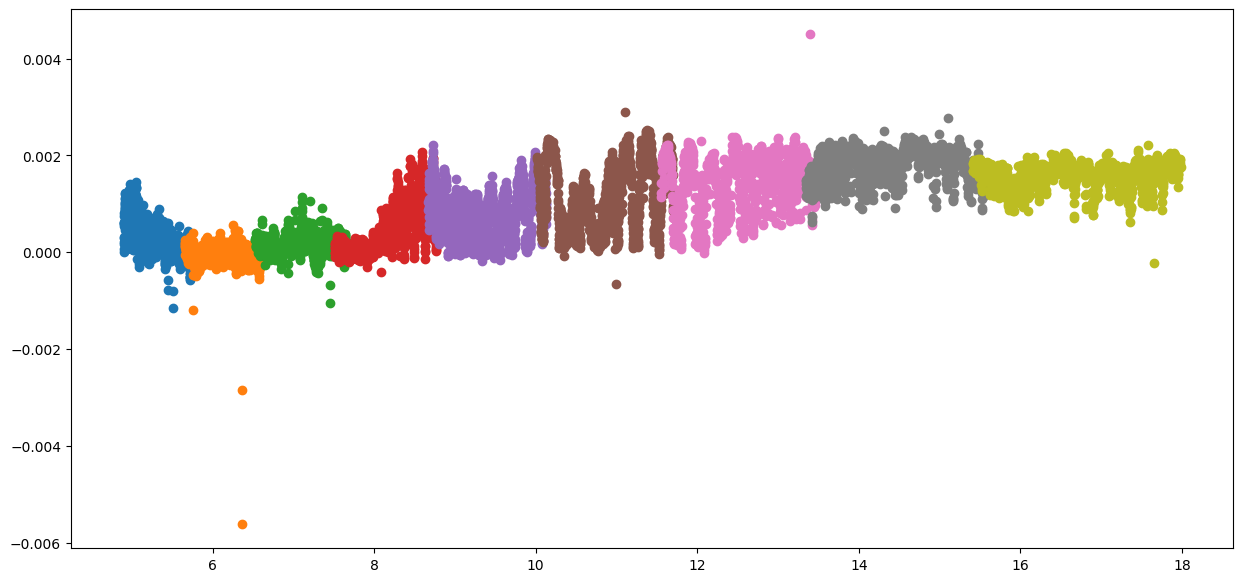

In [12]:
for p in ['ROSS458C_MIRI_260623_tillwl18.txt', 'WISE0458_spectrum_221122_tillwl18.txt', 'WISE0855_spectrum_180423_tillwl18.txt']:
    path = Path('.') / p
    spec= pd.DataFrame()
    spec = pd.read_csv(path, header=0, delimiter = ',')
    
    # converting to numpy 
    for i in range(3):
        if type(spec.iloc[:,i].values[0]) == str:
            spec.iloc[:,i] = str_to_numpy(spec.iloc[:,i])
    
    plotting_source(spec)
    channel_check_for_overlap(spec)
    

There is channel overlap. Needs to be disentangled and rebinned. 